##THE SPARKS FOUNDATION

##TASK -01

###**GRIP-NOV23**

###NAME: SHAIVAL K. JADHAV


Problem Statement-

Predict the percentage of an student based on the no. of hrs. (Using Supervised ML). Also find the predicted score if a student studies for 9.25 hrs/day?

###Importing all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Import Dataset 'student_scores.csv'

In [ ]:
data = pd.read_csv('/content/student_scores.csv')
print("Successfully Imported Dataset")

Successfully Imported Dataset


In [ ]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.shape

(25, 2)

###Checking missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here as you can see, There are no missing values present in the data set.

###Descriptive statistics of dataset

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The describe() function provides us with a five-number summary: min, max, quartile, mean, and count.

###Data Visualization

Text(0, 0.5, 'Marks Score')

<Figure size 1000x500 with 0 Axes>

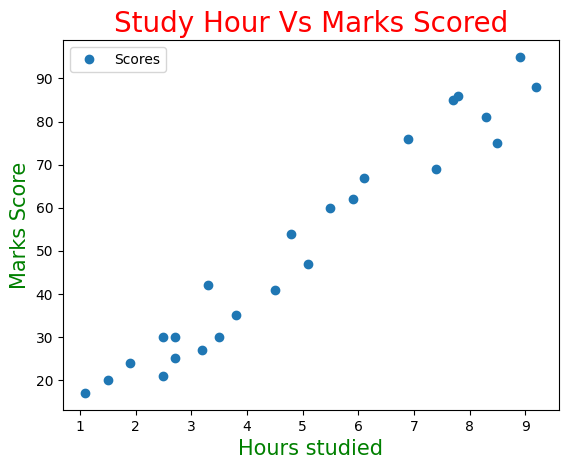

In [ ]:
plt.figure(figsize=(10,5))
data.plot(x = "Hours", y = "Scores", style = 'o')
plt.title("Study Hour Vs Marks Scored", size = 20, color = "Red")
plt.xlabel("Hours studied", size = 15, color = "green")
plt.ylabel("Marks Score", size = 15, color = "green")

The graph above shows a linear relationship between the two variables, namely marks scored and hours studied.

### Divide the data into train and test using built in train_test_split method and training the model

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (x_train, y_train)

print("Training complete.")

Training complete.


In [ ]:
regressor.score(x_train,y_train)

0.9515510725211552

###Plotting the regression line

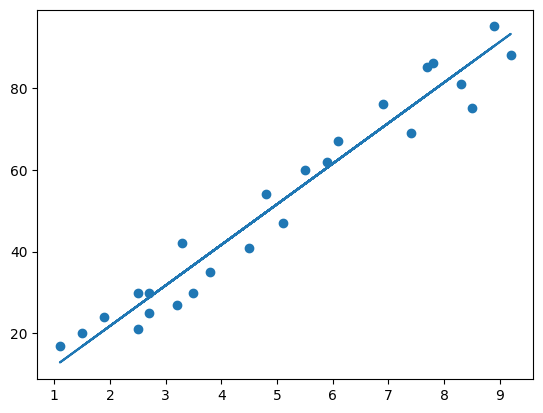

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

Making the predictions on test data

In [ ]:
y_pred = regressor.predict(x_test)

Comparing actual and predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


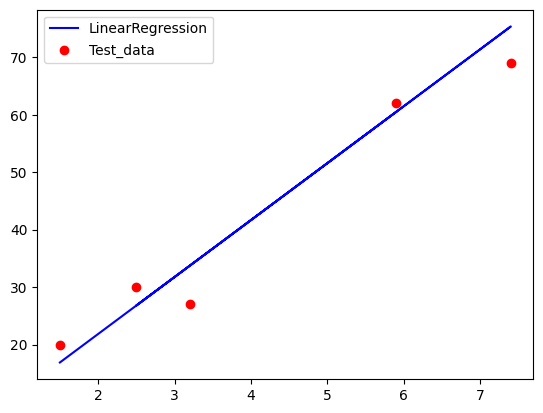

In [ ]:
plt.plot(x_test,y_pred,label='LinearRegression',color = 'b')
plt.scatter(x_test,y_test,label = 'Test_data',color = 'r')
plt.legend()
plt.show()

In [ ]:
regressor.predict([[9.25]])

array([93.69173249])

Evaluation of Model

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 4.18


MAE represents the average of the absolute differences between the predicted scores and the actual scores for the test dataset. In other words, it quantifies how close the predictions are to the actual scores on average. A lower MAE indicates that the model's predictions are closer to the true values, suggesting a more accurate and reliable prediction of students' scores based on their study hours.